# GARCH SPY Forecasting¶


## Read Data

In [3]:
import pandas_datareader.data as web
from datetime import datetime, timedelta
import pandas as pd
import matplotlib.pyplot as plt
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## SPY Volatility 

In [67]:
start = datetime(2019, 3, 23)
end = datetime(2020, 9, 28)

In [68]:
SPY = web.DataReader('SPY', 'yahoo', start=start, end=end)
SPY

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-03-25,280.190002,277.640015,278.869995,279.040009,85575200.0,271.169067
2019-03-26,282.179993,279.559998,280.989990,281.119995,68125900.0,273.190399
2019-03-27,281.760010,277.929993,281.109985,279.649994,72224700.0,271.761841
2019-03-28,281.209991,279.070007,280.350006,280.709991,56238500.0,272.791931
2019-03-29,282.839996,281.140015,282.390015,282.480011,82186800.0,274.512024
...,...,...,...,...,...,...
2020-09-22,330.899994,325.859985,328.570007,330.299988,63612100.0,330.299988
2020-09-23,331.200012,322.100006,330.899994,322.640015,93112200.0,322.640015
2020-09-24,326.799988,319.799988,321.220001,323.500000,76681300.0,323.500000


In [69]:
returns = 100 * SPY.Close.pct_change().dropna()
returns

Date
2019-03-26    0.745408
2019-03-27   -0.522909
2019-03-28    0.379044
2019-03-29    0.630551
2019-04-01    1.185916
                ...   
2020-09-22    1.018438
2020-09-23   -2.319096
2020-09-24    0.266546
2020-09-25    1.616696
2020-09-28    1.660935
Name: Close, Length: 382, dtype: float64

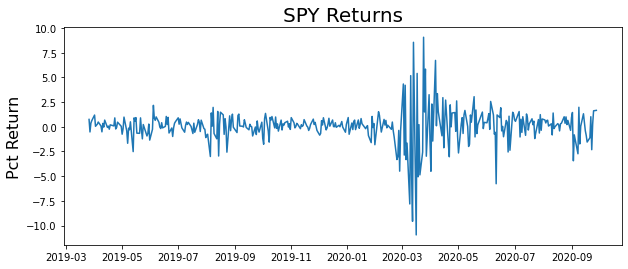

In [70]:
plt.figure(figsize=(10,4))
plt.plot(returns)
plt.ylabel('Pct Return', fontsize=16)
plt.title('SPY Returns', fontsize=20);

## PACF

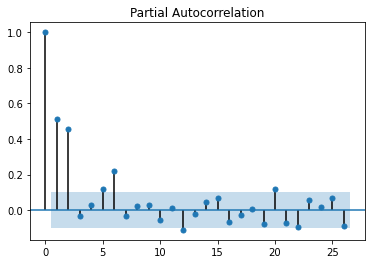

In [71]:
plot_pacf(returns**2)
plt.show()

# FIT GARCH(1,1) on SPY

In [72]:
model = arch_model(returns, p=1, q=1)

In [73]:
model_fit = model.fit()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 564.8641916413098
Iteration:      2,   Func. Count:     15,   Neg. LLF: 563.5775538997598
Iteration:      3,   Func. Count:     22,   Neg. LLF: 558.7093219619987
Iteration:      4,   Func. Count:     29,   Neg. LLF: 558.5331227634977
Iteration:      5,   Func. Count:     37,   Neg. LLF: 558.4420630274487
Iteration:      6,   Func. Count:     43,   Neg. LLF: 557.6593854241177
Iteration:      7,   Func. Count:     50,   Neg. LLF: 557.6556389044499
Iteration:      8,   Func. Count:     56,   Neg. LLF: 557.6525131448616
Iteration:      9,   Func. Count:     62,   Neg. LLF: 557.6515916451219
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 557.6515913053349
            Iterations: 9
            Function evaluations: 63
            Gradient evaluations: 9


In [74]:
model_fit.summary

<bound method ARCHModelResult.summary of                      Constant Mean - GARCH Model Results                      
Dep. Variable:                  Close   R-squared:                      -0.002
Mean Model:             Constant Mean   Adj. R-squared:                 -0.002
Vol Model:                      GARCH   Log-Likelihood:               -557.652
Distribution:                  Normal   AIC:                           1123.30
Method:            Maximum Likelihood   BIC:                           1139.08
                                        No. Observations:                  382
Date:                Wed, Oct 07 2020   Df Residuals:                      378
Time:                        18:40:52   Df Model:                            4
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.1400  

# FIT GARCH(2,2) on SPY

In [75]:
model = arch_model(returns, p=2, q=2)

In [76]:
model_fit = model.fit()

Iteration:      1,   Func. Count:      8,   Neg. LLF: 570.5650891793264
Iteration:      2,   Func. Count:     19,   Neg. LLF: 569.7395542541174
Iteration:      3,   Func. Count:     29,   Neg. LLF: 567.7399650262112
Iteration:      4,   Func. Count:     38,   Neg. LLF: 561.330667209463
Iteration:      5,   Func. Count:     47,   Neg. LLF: 557.6624719849576
Iteration:      6,   Func. Count:     56,   Neg. LLF: 557.1273070564458
Iteration:      7,   Func. Count:     64,   Neg. LLF: 556.558371661711
Iteration:      8,   Func. Count:     73,   Neg. LLF: 555.9719461071389
Iteration:      9,   Func. Count:     83,   Neg. LLF: 555.8994943385084
Iteration:     10,   Func. Count:     91,   Neg. LLF: 555.54710814901
Iteration:     11,   Func. Count:    100,   Neg. LLF: 555.4037547036107
Iteration:     12,   Func. Count:    108,   Neg. LLF: 555.3882815808682
Iteration:     13,   Func. Count:    116,   Neg. LLF: 555.3857579108299
Iteration:     14,   Func. Count:    124,   Neg. LLF: 555.3855510026

In [77]:
model_fit.summary

<bound method ARCHModelResult.summary of                      Constant Mean - GARCH Model Results                      
Dep. Variable:                  Close   R-squared:                      -0.002
Mean Model:             Constant Mean   Adj. R-squared:                 -0.002
Vol Model:                      GARCH   Log-Likelihood:               -555.386
Distribution:                  Normal   AIC:                           1122.77
Method:            Maximum Likelihood   BIC:                           1146.44
                                        No. Observations:                  382
Date:                Wed, Oct 07 2020   Df Residuals:                      376
Time:                        18:41:05   Df Model:                            6
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.1309  

# Forecasting SPY Volatility using GARCH(2,2)

In [145]:
rolling_predictions = []
test_size =365

for i in range(test_size):
    train = returns[:-(test_size-i)]
    model = arch_model(train, p=2, q=2)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

In [146]:
rolling_predictions = pd.Series(rolling_predictions, index=returns.index[-365:])

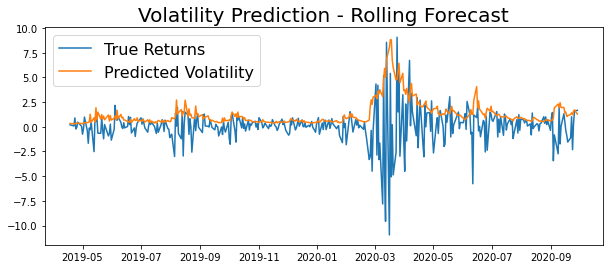

In [147]:
plt.figure(figsize=(10,4))
true, = plt.plot(returns[-365:])
preds, = plt.plot(rolling_predictions)
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Returns', 'Predicted Volatility'], fontsize=16);

In [148]:
train = returns
model = arch_model(train, p=2, q=2)
model_fit = model.fit(disp='off')

In [150]:
pred = model_fit.forecast(horizon=7)
future_dates = [returns.index[-1] + timedelta(days=i) for i in range(1,8)]
pred = pd.Series(np.sqrt(pred.variance.values[-1,:]), index=future_dates)

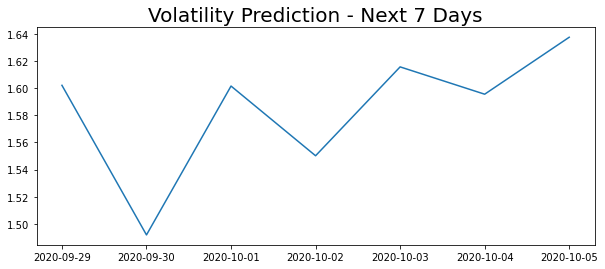

In [151]:
plt.figure(figsize=(10,4))
plt.plot(pred)
plt.title('Volatility Prediction - Next 7 Days', fontsize=20);

# Back Testing

In [152]:
start1 = datetime(2020, 9, 28)
end1 = datetime(2020, 10, 5)

In [153]:
actula_obs = web.DataReader('SPY', 'yahoo', start= start1, end= end1)

In [154]:
returns.obs = 100 * actula_obs.Close.pct_change().dropna()

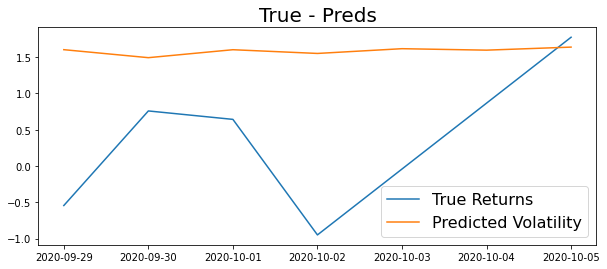

In [155]:
plt.figure(figsize=(10,4))
true, = plt.plot(returns.obs)
preds, = plt.plot(pred)
plt.title('True - Preds', fontsize=20)
plt.legend(['True Returns', 'Predicted Volatility'], fontsize=16);